In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
X_train.shape 
# 60000 images, and each image is 28 x 28 i.e 784 pixels means 784 features

(60000, 28, 28)

In [8]:
X_train[0].shape
# shape of first image

(28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

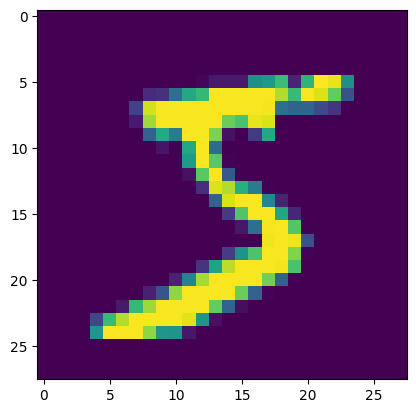

In [12]:
# let's convert these pixels to image
plt.plot()
plt.imshow(X_train[0])

In [13]:
# Scaling

X_train = X_train / 255
X_test = X_test / 255

In [31]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))   # this will convert into 1D i.e 784
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8537 - loss: 0.4890 - val_accuracy: 0.9584 - val_loss: 0.1433
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9657 - loss: 0.1196 - val_accuracy: 0.9668 - val_loss: 0.1085
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9765 - loss: 0.0784 - val_accuracy: 0.9709 - val_loss: 0.0985
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0562 - val_accuracy: 0.9676 - val_loss: 0.1044
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9857 - loss: 0.0432 - val_accuracy: 0.9711 - val_loss: 0.0994
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9893 - loss: 0.0335 - val_accuracy: 0.9733 - val_loss: 0.0929
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9741 - val_loss: 0.0967
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9926 - loss: 0.0241 - 

In [35]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
y_pred = y_prob.argmax(axis=1)   # according to the model these are images value.

In [46]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.9739

In [40]:
history.history

{'accuracy': [0.9191458225250244,
  0.9667500257492065,
  0.9767083525657654,
  0.9824166893959045,
  0.9849166870117188,
  0.9879375100135803,
  0.9895625114440918,
  0.9917708039283752,
  0.9928958415985107,
  0.9936249852180481],
 'loss': [0.2743576765060425,
  0.11331510543823242,
  0.07785867154598236,
  0.05901503935456276,
  0.04701239615678787,
  0.03653908148407936,
  0.03119600936770439,
  0.025895899161696434,
  0.021047726273536682,
  0.018435906618833542],
 'val_accuracy': [0.9584166407585144,
  0.9667500257492065,
  0.9709166884422302,
  0.9675833582878113,
  0.9710833430290222,
  0.9733333587646484,
  0.9740833044052124,
  0.9712499976158142,
  0.9744166731834412,
  0.9737499952316284],
 'val_loss': [0.1433374136686325,
  0.1084546223282814,
  0.09849584102630615,
  0.10441937297582626,
  0.0994289368391037,
  0.09291716665029526,
  0.096665158867836,
  0.11179396510124207,
  0.10206155478954315,
  0.10643607378005981]}

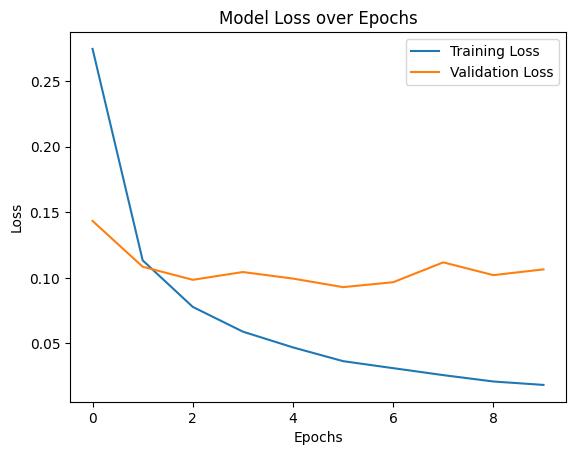

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

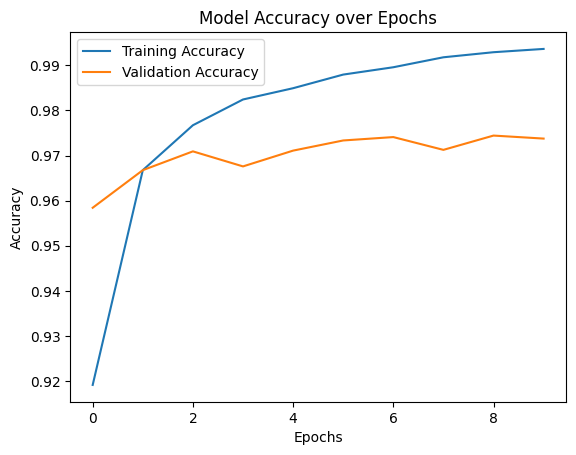

In [42]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([7])

In [50]:
# Our model correctly predicted the first image rom test data.

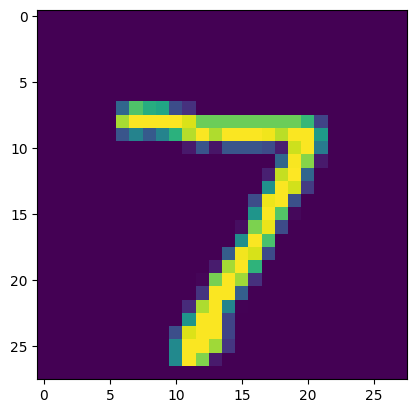

In [51]:
plt.imshow(X_test[0])